In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tabla_y = pd.read_csv("../Data/ic50.csv", header=None, index_col=None)
features = pd.read_csv("../Data/genomic_features.csv", header=0, index_col=None)

In [10]:
from sklearn.utils import shuffle

In [9]:
from sklearn.datasets import make_regression

In [30]:
X, y = make_regression(n_samples=10000, n_features=300, n_informative=50, n_targets=1,\
                       bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.5)

In [32]:
y_bar, x_bar = np.histogram(y, bins=1000)

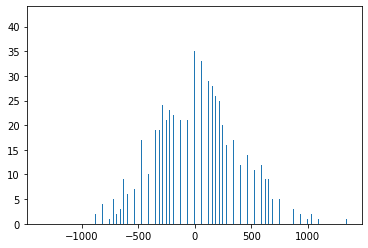

In [33]:
plt.bar(x_bar[1:], y_bar, 0.5)
plt.show()

In [99]:
mask_nan = np.random.randint(0, 2, size=(10000, 300), dtype=bool)
X[mask_nan] = np.nan

In [100]:
df = pd.DataFrame(data=X, columns=[f"Column {i}" for i in range(300)])

In [101]:
mask = df.isna().values

In [106]:
from sklearn.impute import SimpleImputer

In [113]:
simp = SimpleImputer(strategy='most_frequent')

In [114]:
df_filled = simp.fit_transform(df)

In [117]:
df_filled = pd.DataFrame(data=df_filled, columns=[f"Column {i}" for i in range(300)])
df_filled.describe()

,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,...,Column 290,Column 291,Column 292,Column 293,Column 294,Column 295,Column 296,Column 297,Column 298,Column 299
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.843666,-1.848486,-1.634977,-1.745619,-1.590571,-1.743344,-1.759625,-1.799333,-1.801645,-1.862249,...,-2.060792,-1.651222,-1.719640,-1.711673,-1.848759,-1.831077,-1.889086,-1.632431,-1.899281,-1.905459
std,1.974317,1.962121,1.783846,1.866053,1.729755,1.877222,1.908723,1.955962,1.941062,1.990522,...,2.154792,1.799692,1.833556,1.889904,1.958681,1.936987,2.022001,1.790249,2.014263,1.997839
min,-3.673979,-3.674409,-3.252844,-3.455337,-3.167385,-3.470878,-3.534166,-3.613259,-3.596686,-3.706354,...,-4.084391,-3.291488,-3.408057,-3.484580,-3.673112,-3.604975,-3.775278,-3.283147,-3.774320,-3.741582
25%,-3.673979,-3.674409,-3.252844,-3.455337,-3.167385,-3.470878,-3.534166,-3.613259,-3.596686,-3.706354,...,-4.084391,-3.291488,-3.408057,-3.484580,-3.673112,-3.604975,-3.775278,-3.283147,-3.774320,-3.741582
50%,-3.673979,-3.674409,-3.252844,-3.455337,-3.167385,-3.470878,-2.732774,-3.613259,-3.596686,-3.706354,...,-4.084391,-3.291488,-3.408057,-2.280643,-3.234464,-3.604975,-3.775278,-2.590287,-3.774320,-3.741582
75%,0.016098,-0.024212,-0.013171,-0.010312,-0.003951,0.019968,0.011997,0.033163,0.031774,-0.001388,...,-0.025413,0.011892,-0.022640,0.036909,-0.020311,0.005242,0.003598,0.012818,0.022193,-0.015973
max,3.988037,3.701152,3.544269,3.479150,3.348117,3.351244,3.545009,3.705980,3.319700,4.063464,...,3.376743,3.684643,3.457987,3.622974,3.492002,3.945636,3.207805,4.233394,3.771176,3.548124


In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

In [132]:
X_transformed = model.transform(df)

In [141]:
model.predict(df.values[-10:, :])

array([ -17.89568355,   13.96477811,   13.50203221,  132.845165  ,
       -248.02997927, -215.88790118,  -56.47779041,  -97.14031186,
       -120.49804476,   63.63937073])

# NOTA: No se separo el banco de datos en entrenamiento y prueba

In [142]:
model.score(df.values[-200:, :], y[-200:])

0.051515616733194824

## Evaluando modelo con validacion cruzada de k=5

In [187]:
scores = cross_val_score(estimator=model, X=df, y=y, cv=KFold(n_splits=10))

In [189]:
scores.mean()

0.4599375968421534

In [193]:
mean_score = []
alphas = np.logspace(-2, 3, 20)
for alpha in alphas:
    model = Pipeline([("Imputer", SimpleImputer(strategy='mean')),#'most_frequent')),
                      ("Scaling", StandardScaler()),
                      ("DimensionRed", PCA(0.98)),
                      ("Regression", Ridge(alpha=alpha))])
    scores = cross_val_score(estimator=model, X=df, y=y, cv=KFold(n_splits=10), n_jobs=-1)
    mean_score.append(scores.mean())

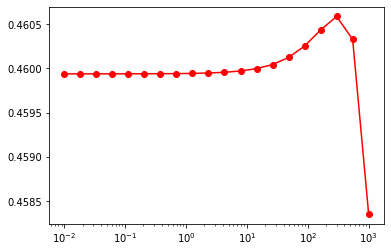

In [196]:
plt.semilogx(alphas, mean_score, 'ro-')

# Una vez entrenado el modelo, lo guardamos para deploy

In [160]:
model.fit(df, y)

Pipeline(memory=None,
         steps=[('Imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('Scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('DimensionRed',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Regression',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [178]:
import pickle

In [ ]:
pickle.dump(model, open("modelo_regresion.pkl", "wb"))

In [182]:
modeloLeido = pickle.load(open("modelo_regresion.pkl", "rb"))

# Mas info 

https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py